<a href="https://colab.research.google.com/github/jpandersen61/Machine-Learning/blob/main/Mandatory_assignment_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mandatory Assignment: Quality classification of Vino Verde wines

###Domain description

According to Wikipedia (https://en.wikipedia.org/wiki/Vinho_Verde):

*Vinho Verde  refers to Portuguese wine that originated in the historic Minho province in the far north of the country.*

You are now going to devolop a model that can classify such wines from a set of features. We are interested in high quality wines. So such wines labelled as `True` ('high quality') or `False` ('not so high quality'). In our case `True` and `False` are the positive label and the negative label, respectively.



### Confusion Matrix and performance measures


Now take your time to recall the confusion matrix and classification and some important related performance measures

That is taking a look again on this in chapter 3 section regarding 'Confusion Matrices'

Especially keep in mind the following performance concepts related to classification:
*   **Precision** Fraction of positively predicted instances, that are correcly classified
*   **Recall** Fraction of postive labelled instances, that classified as positive
*   **Accuracy** Fraction of instances - positive or negative labbelled - that are coorectly classified.


Look at the toy example code below for clarification


Check also the following references:
1.   Calculating matrices: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
2.   Displaying confusion matrices: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

1.   Performance measures: https://scikit-learn.org/stable/modules/model_evaluation.html













In [ ]:
#Define labels for wine quality - That is true, if the quality is high. Otherwise false (low quality)
highQLabels=[False,True]

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

#Define the quality label for each wine
y_true = [True, False, True, True, False, True, True, False, True, True, False, True, False, False, False, True, True, False, True, True]

#Assume that the quality for each wine has been predicted as follows
y_pred = [False, False, True, True, False, True,False, False, True, True, False, True, True, False, False, True, True, False, True, False]

#Establish the confusion matrix
cm=confusion_matrix(y_true, y_pred, labels=highQLabels)
cm


array([[7, 1],
       [3, 9]])

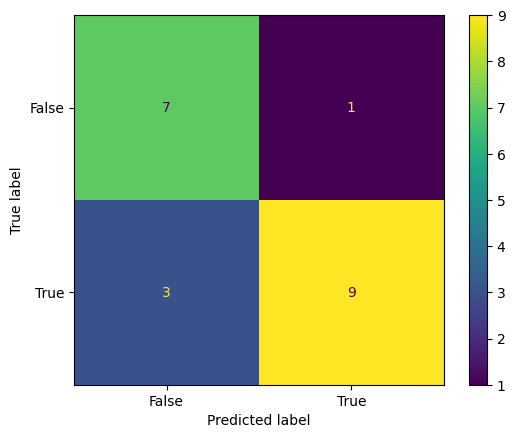

In [ ]:
#Display the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=highQLabels)
disp.plot()
plt.show()

In [ ]:
#Calculate the precision score: TP/(FP+TP) = 9/(1+9) = 0.9
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.9

In [ ]:
#Calculate the recall score: TP/(FN+TP) = 9/(3+9) = 0.75
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.75

In [ ]:
#Calculate the accuracy score: (TN+TP)/(TN+FP+TP+FN) = (7+9)/(7+1+9+3) = 0.8
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8

### Assignment 1: What does the performance measures mean?

Explain how the precission, recall and accuracy performance measures can make sense ?

What does that mean in our Portuguese wine case ?

Add text cells below for your answer.

### Assignment 2: Importing data

Do the following:
1.   Please find the wines quality here:  
https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/WineQT.csv
2.   Run the next cell below to load the data in.


In [ ]:
#Importing the dataset
datafile="https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/WineQT.csv"
dataset = pd.read_csv(datafile)
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


###Assignment 3: Checking the dataset

Always do yourself a favour to check data:
1.   Extract information about the data structure with the `type` method in a cell code cell below.
2.   Check dataset with `info()` method provided by the `DataFrame` class in a cell code cell below.
3.   Is there any missing data in the dataset?
4.   State your observations on the dataset in a text cell below





State your observations on the dataset:
Dataset is of type DataFrame and there no missing values

### Assignment 4: Selecting features and labels

Introduce code in the cells below that do the following:
1.   You may drop some features. E.g. with `dataset.drop(..., axis=1, inplace=True)`. Consider dropping some of the 'acidity' and 'sulfur' features, because the may depend on similar features.
2.   Extract the features with `X = dataset.iloc...`. Remember to leave out 'quality' and 'Id'
1.   Extract the quality class labels with `y = dataset["quality"].isin([6,7])` This will assign 'high quality' (`True` value) to wines having quality 6 or 7. The rest of the wines will then have their quality class labelled with `False`

Introduce one or more cells to carry what is mentioned above.

If time allows: you may also try experient with combining features






Introduce code in the cell below that stratifies the dataset:
1.   Import the `train_test_split` stratifier - that is: `from sklearn.model_selection import train_test_split`
2.   Split the dataset in training set and test set, where we stratify on the quality class labels - that is: `X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)`  

Check also the following references on `train_test_split`:
1.   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
2.   Chapter 2 and Python code base for chapter: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html




### Assignment 5: Stratifying the dataset (continued)

Answer the following questions:
1.   What are the variables `X_train`, `X_test`, `y_train` and `y_test` going to be used for ?
2.   Explains the parameter `stratify=y` (Hint: Yes it has something to with stratifiction on quality class labels)

State your answers (e.g. in a cell below)


### Assignment 6: Establish the MLP Classifier and pipeline

Do the following in the cell below to establish a Multi Layer Perceptron:
1.   Import the classifier - that is: `from sklearn.neural_network import MLPClassifier`
2.   Import the standard scaler - that is: `from sklearn.preprocessing import StandardScaler`
1.   Import pipelining - that is: `from sklearn.pipeline import make_pipeline`
2.   Establish the MLP Classifier - that is something like this `MLPClassifier(hidden_layer_sizes=[5], activation="relu" , max_iter=10_000, random_state=42)`
1.   Establish a pipeline containing `MLPClassifier` and `StandardScaler`- that is something like this:  `make_pipeline(StandardScaler(), ...)`



Also check the following references:
1.   MLP Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html and Chapter 10 including code reference for this chapter: https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb
2.   Standard scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html and chapter 2
1.   Pipelining: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html and  chapter 2






### Assignment 7: Establish the MLP Classifier and pipeline (continued)

Answer the following questions (e.g. in a cell below):
1.   Why is it important to apply the `StandardScaler` ?
2.   What is the point on establishing a pipeline ?
1.   Explain the `hidden_layer_sizes` parameter.
2.   Explain the `activation` paramater.
1.   Explain the `max_iter` parameter.       
2.   Explain the `random_state` parameter.
1.   Can you find out how many layers perceptron has (hint: look after an attribute) ?










### Assignment 8: Fitting the model

Fit the model by calling the `fit` method on the pipeline in the cell below


### Assignment 9: Fitting the model (continued)

Answer the following question(s) (e.g. in a cell below):
1.   What does it actually mean to fit a model ?
1.   What does specifically mean in our wine case model ?







### Assignment 10: Observing the models score

Do the following in the cells below to calculate the models accuracy score:
1.   Calculate the accuracy score on the training set - that is: `pipeline.score(X_train, y_train)` in its own cell
2.   Calculate the accuracy score on the test set - that is: `pipeline.score(X_test, y_test)` in its own cell

Also Check the following references on pipelining:
1.   Score method: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.score


### Assignment 11: Observing the models score (continued)





Observe among other things on the underfit and overfit conditions:
1.   Try different settings of `hidden_layer_sizes` and  `activation` parameters
2.   Try dropping out and/or combine features
1.   What do you observe?

State your answers and observations (e.g. in a cell below)





### Assignment 12: Confusion Matrix and performance measures (revisited)



Repeat assignment 1 with MLP Classifiers' score fitted with the Vino Verde wines dataset

### Assignment 13:Try with other classifiers - Extra

For the fast ones

Try to get a better a performance by applying another classifier algorithm